In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

IMAGEPATH = '../slides/eods-07-machinelearningmodels_2/images/'
%matplotlib inline

In [3]:
from sklearn import datasets
wine = datasets.load_wine()
X = pd.DataFrame(wine.data,columns=wine.feature_names)
y = wine.target

# keep only class 0 and 1 and two columns of X and standardize X
features = wine.feature_names[3:5]
X = X.iloc[y < 2,3:5].apply(lambda x: (x-x.mean())/x.std()).values
y = y[y < 2]
X.shape,y.shape

((130, 2), (130,))

In [5]:
from sklearn.svm import SVC

In [11]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

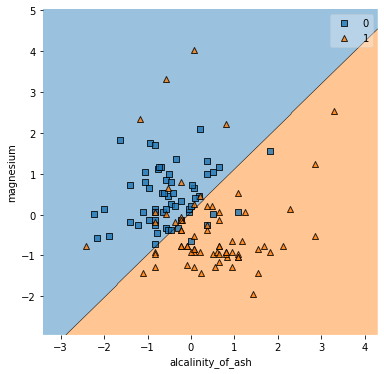

In [9]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=svm_linear);
plt.xlabel(features[0]); plt.ylabel(features[1]);

plt.savefig(IMAGEPATH+'wine_2class_svm_linear.png')

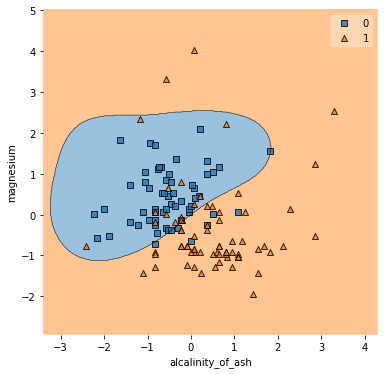

In [8]:
svm_linear = SVC(kernel='rbf').fit(X,y)
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=svm_linear);
plt.xlabel(features[0]); plt.ylabel(features[1]);

In [15]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

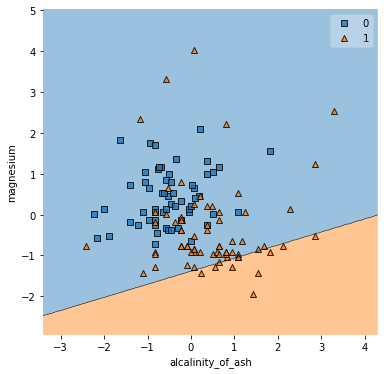

In [16]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=perceptron);
plt.xlabel(features[0]); plt.ylabel(features[1]);

plt.savefig(IMAGEPATH+'wine_2class_perceptron.png')

In [18]:
from sklearn.neural_network import MLPClassifier

In [53]:
mlp_1hl_sigmoid = MLPClassifier(hidden_layer_sizes=(100,),activation='logistic',max_iter=1000)
mlp_1hl_sigmoid.fit(X,y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

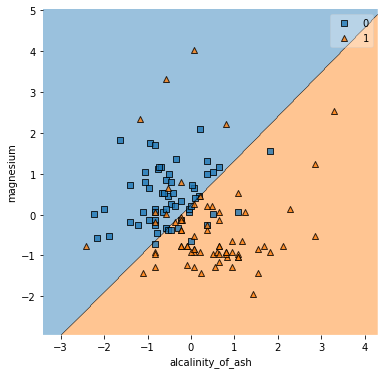

In [54]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=mlp_1hl_sigmoid);
plt.xlabel(features[0]); plt.ylabel(features[1]);

plt.savefig(IMAGEPATH+'wine_2class_mlp_1hl_sigmoid.png')

In [67]:
mlp_2hl_sigmoid = MLPClassifier(hidden_layer_sizes=(100,100,),activation='logistic',max_iter=1000).fit(X,y)

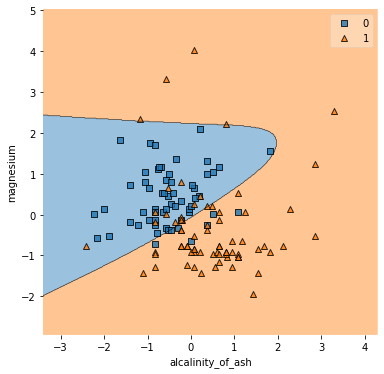

In [68]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=mlp_2hl_sigmoid);
plt.xlabel(features[0]); plt.ylabel(features[1]);

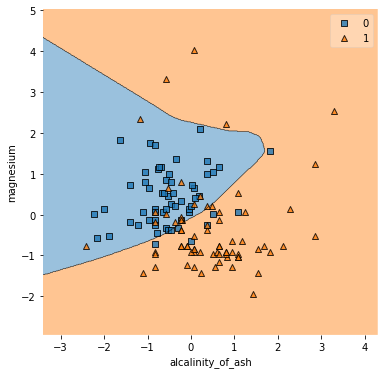

In [69]:
mlp_1hl_relu = MLPClassifier(hidden_layer_sizes=(100,),activation='relu',max_iter=1000).fit(X,y)

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=mlp_1hl_relu);
plt.xlabel(features[0]); plt.ylabel(features[1]);

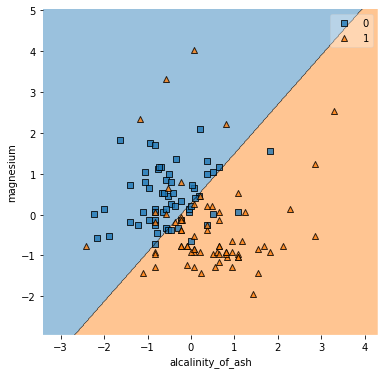

In [78]:
mlp_1hl_identity = MLPClassifier(hidden_layer_sizes=(100,),activation='identity',max_iter=1000,random_state=123).fit(X,y)

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=mlp_1hl_identity);
plt.xlabel(features[0]); plt.ylabel(features[1]);

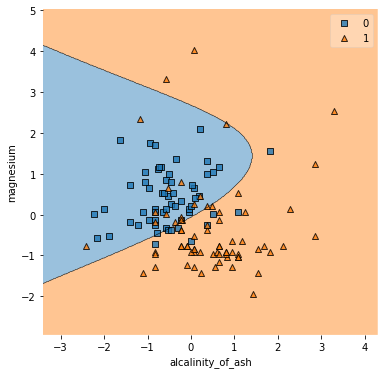

In [77]:
mlp_1hl_tanh = MLPClassifier(hidden_layer_sizes=(100,),activation='tanh',max_iter=1000,random_state=123).fit(X,y)

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=mlp_1hl_tanh);
plt.xlabel(features[0]); plt.ylabel(features[1]);

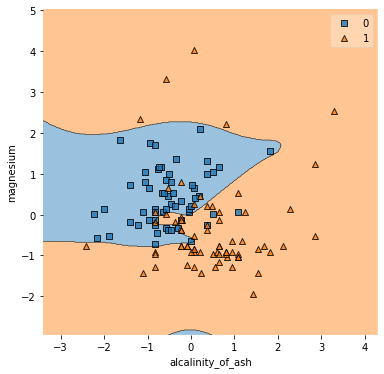

In [80]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,10),activation='tanh',max_iter=5000,random_state=123).fit(X,y)

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=mlp);
plt.xlabel(features[0]); plt.ylabel(features[1]);

In [86]:
[x.shape for x in mlp.coefs_]

[(2, 100), (100, 100), (100, 10), (10, 1)]

In [87]:
mlp.coefs_[-1]

array([[-1.13122203],
       [-1.66677708],
       [ 1.22386128],
       [ 0.44630515],
       [-1.12124001],
       [-0.60008687],
       [ 1.37994659],
       [-0.98005517],
       [-0.63742972],
       [-0.53517635]])